<h1> <center>LEITURA E VISUALIZAÇÃO INICIAL DE DADOS</center> </h1>
<h3> <center>ACCESSO À DADOS DE SATÉLITES VIA API NASA</center> </h3>
<center><img width="700" height="500" src="https://cdn.pixabay.com/photo/2010/12/05/international-space-station-974_1280.jpg"></center>
<center> Data Source: <a href='https://cdaweb.gsfc.nasa.gov/index.html/'>Coordinated Data Analysis Web (CDAWeb)</a> </center>
<center> API Documentation: <a href='https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/'>Package for accessing the Coordinate Data Analysis System (CDAS) web services </a> </center>

#### Para a coleta dos dados é necessária a instalação da API via "pip install cdasws", com isso é possível acessar os dados diretamente do Coordinate Data Analysis System (CDAS) web services.

In [3]:
# Importing libraries
#Visualização dos dados
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
#tratamento dos dados
import pandas as pd
import numpy as np
# Criando o modelo de ML
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error  #RMSE
#Bibliotecas para importação dados da Api da NASA
from cdasws import CdasWs
from cdasws import TimeInterval
# Retirar avisos
import warnings
warnings.filterwarnings('ignore')

cdas = CdasWs()

#### Após a importação das bibliotecas o nosso ambiente está pronto para iniar o carregamento dos dados, inicialmente iremos fazer alguns testes com a API. Vamos explorar as seguintes classes:
* get_instrument_types
* get_instruments
* get_observatories
* get_observatory_groups

##### A classe "get_instrument_types" retorna uma matriz de dicionários com os tipos de instrumentos disponiveis na base de dados que espelha a seguinte [estrutura](https://cdaweb.gsfc.nasa.gov/WebServices/REST/CDAS.xsd.).

In [40]:
# Importa a lista com todos os instrumentos disponíves na base de dados da NASA
todos_instrumentos = cdas.get_instrument_types()
#Mostra os tipos de instrumentos disponíveis
for instrumento in todos_instrumentos:
    print(instrumento.values())

dict_values(['Activity Indices'])
dict_values(['Electric Fields (space)'])
dict_values(['Electron Precipitation Bremsstrahlung'])
dict_values(['Engineering'])
dict_values(['Ephemeris/Attitude/Ancillary'])
dict_values(['Gamma and X-Rays'])
dict_values(['Ground-Based HF-Radars'])
dict_values(['Ground-Based Imagers'])
dict_values(['Ground-Based Magnetometers, Riometers, Sounders'])
dict_values(['Ground-Based VLF/ELF/ULF, Photometers'])
dict_values(['Housekeeping'])
dict_values(['Imager (space)'])
dict_values(['Imagers (Space)'])
dict_values(['Imagers (space)'])
dict_values(['Imaging and Remote Sensing (ITM/Earth)'])
dict_values(['Imaging and Remote Sensing (Magnetosphere/Earth)'])
dict_values(['Imaging and Remote Sensing (Sun)'])
dict_values(['Magnetic Fields (Balloon)'])
dict_values(['Magnetic Fields (space)'])
dict_values(['Particles (space)'])
dict_values(['Plasma and Solar Wind'])
dict_values(['Pressure gauge (space)'])
dict_values(['Radio and Plasma Waves (space)'])
dict_values(['Spa

##### Podemos também filtra os instrumentos por observatório, ou grupo de observatórios

In [43]:
#assumindo o observatório AC que está dentro do grupo de observatórios ACE
instrumentos_obs_AC = cdas.get_instrument_types(observatory='AC')
#Mostra os tipos instrumentos disponíveis
print("###### Observatório AC ######")
for instrumento in instrumentos_obs_AC:
    print(instrumento.values())


instrumentos_obs_group_AC = cdas.get_instrument_types(observatoryGroup='ACE')
#Mostra os tipos instrumentos disponíveis
print("###### Grupo de Observatórios ACE ######")
for instrumento in instrumentos_obs_group_AC:
    print(instrumento.values())

###### Observatório AC ######
dict_values(['Ephemeris/Attitude/Ancillary'])
dict_values(['Magnetic Fields (space)'])
dict_values(['Particles (space)'])
dict_values(['Plasma and Solar Wind'])
###### Grupo de Observatórios ACE ######
dict_values(['Activity Indices'])
dict_values(['Electric Fields (space)'])
dict_values(['Ephemeris/Attitude/Ancillary'])
dict_values(['Magnetic Fields (space)'])
dict_values(['Particles (space)'])
dict_values(['Plasma and Solar Wind'])


##### Como o esperado os instrumentos que estão no observatório AC também estão no grupo de observatórios ACE, pois um pertence ao outro. Podemos ver também que no grupo ACE possuem outros observatórios com instrumentos diferentes do observatório AC.  
##### Com isso já conseguimos identificar em qual observatório/grupo de observatórios, conseguimos encontrar os dados dos intrumentos que necessitamos.

##### Podemos também ter uma lista e a descrição dos instrumentos disponíveis utilizando a classe "get_intruments()". Como temos muitos instrumentos cadastrados para essa classe é bom definirmos um observatório para verificar os instrumentos disponíveis, ou um tipo de instrumento específico.

In [49]:
# Importa a lista com os instrumentos disponíves na base de dados, considerando o observatório AC
# e depois o tipo de instrumento Plasma and Solar Wind
instrumentos_obs_AC = cdas.get_instruments(observatory='AC')
#Mostra os instrumentos disponíveis tendo o nome, uma descrição curta e uma descrição completa
print("###### Observatório AC ######")
for instrumento in instrumentos_obs_AC:
    print(instrumento.values())


instrumentos_tipo_SW = cdas.get_instruments(instrumentType='Plasma and Solar Wind')
#Mostra os instrumentos disponíveis tendo o nome, uma descrição curta e uma descrição completa
print("###### Tipo de instrumento Plasma and Solar Wind ######")
for instrumento in instrumentos_tipo_SW:
    print(instrumento.values())

###### Observatório AC ######
dict_values(['CRIS', 'ACE Cosmic Ray Isotope Spectrometer', 'ACE Cosmic Ray Isotope Spectrometer'])
dict_values(['DEF', 'Definitive Data ', 'Definitive Data '])
dict_values(['EPAM', 'ACE Electron Proton Alpha Monitor', 'ACE Electron Proton Alpha Monitor'])
dict_values(['EPM', 'ACE Electron, Proton, and Alpha Monitor', 'ACE Electron, Proton, and Alpha Monitor'])
dict_values(['GIFWALK', '', ''])
dict_values(['MAG', 'ACE Magnetic Field Instrument', 'ACE Magnetic Field Instrument'])
dict_values(['MFI', 'ACE Magnetic Field Instrument', 'ACE Magnetic Field Instrument'])
dict_values(['SEPICA', 'The Solar Energetic Particle Ionic Charge Analyzer ', 'The Solar Energetic Particle Ionic Charge Analyzer '])
dict_values(['SIS', 'ACE Solar Isotope Spectrometer', 'ACE Solar Isotope Spectrometer'])
dict_values(['SWE', 'ACE Solar Wind Electron Proton Alpha Monitor', 'ACE Solar Wind Electron Proton Alpha Monitor'])
dict_values(['SWEP', 'ACE Solar Wind Electron Proton Alpha 

##### Como vimos a o uso da classe passando como argumento o tipo do instrumento ainda retorna muitos resultados, então é interessante definir uma junção entre o tipo do instrumento e o observatório.

##### Agora para sabermos quais os observatórios disponíveis podemos utilizar a classe "get_observatories()", retornando todos os observatórios na base de dados, podemos também utilizar os argumentos de instrumento e tipo de instrumento para refinar a lista.

In [53]:
# Importa a lista com os onservatórios disponíves na base de dados
observatorios_geral = cdas.get_observatories()
#Mostra os observatórios disponíveis tendo o nome, uma descrição curta e uma descrição completa
for observatorio in observatorios_geral:
    print(observatorio.values())

dict_values(['(null)', '(null)', '(null)'])
dict_values(['AC', 'Advanced Composition Explorer', 'Advanced Composition Explorer'])
dict_values(['ACE', 'ACE', 'ACE'])
dict_values(['ALSEP', 'Apollo Lunar Surface Experiment Package', 'Apollo Lunar Surface Experiment Package'])
dict_values(['AMPTE-CCE', 'Active Magnetospheric Particle Tracer Explorers Charge Composition Explorer', 'Active Magnetospheric Particle Tracer Explorers Charge Composition Explorer'])
dict_values(['Ahead', 'Solar Terrestrial Relations Observatory ` of the Sun-Earth Line', 'Solar Terrestrial Relations Observatory ` of the Sun-Earth Line'])
dict_values(['Alouette-2', 'International Satellite for Ionosphere Studies 1', 'International Satellite for Ionosphere Studies 1'])
dict_values(['Arase(ERG)', 'Arase(ERG)', 'Arase(ERG)'])
dict_values(['BEPICOLOMBO', ' Bepicolombo', ' Bepicolombo'])
dict_values(['BORRELLY', ' Borrelly', ' Borrelly'])
dict_values(['Behind', 'Solar Terrestrial Relations Observatory . of the Sun-Earth 

In [54]:
#Mostra os observatórios disponíveis com instrumentos do tipo tendo o nome, uma descrição curta e uma descrição completa
observatorios_com_SW = cdas.get_observatories(instrumentType='Plasma and Solar Wind')
print("###### Tipo de instrumento Plasma and Solar Wind ######")
for observatorio in observatorios_com_SW:
    print(observatorio.values())

###### Tipo de instrumento Plasma and Solar Wind ######
dict_values(['AC', 'Advanced Composition Explorer', 'Advanced Composition Explorer'])
dict_values(['ALSEP', 'Apollo Lunar Surface Experiment Package', 'Apollo Lunar Surface Experiment Package'])
dict_values(['C1', 'Cluster spacecraft 1', 'Cluster spacecraft 1'])
dict_values(['C2', 'Cluster spacecraft 2', 'Cluster spacecraft 2'])
dict_values(['C3', 'Cluster spacecraft 3', 'Cluster spacecraft 3'])
dict_values(['C4', 'Cluster spacecraft 4', 'Cluster spacecraft 4'])
dict_values(['DSCOVR', 'Deep Space Climate Observatory', 'Deep Space Climate Observatory'])
dict_values(['EQ', 'Equator-S', 'Equator-S'])
dict_values(['GEOTAIL', 'Geomagnetic Tail', 'Geomagnetic Tail'])
dict_values(['Genesis', ' Genesis', ' Genesis'])
dict_values(['HELIOS-1', 'Helios-1', 'Helios-1'])
dict_values(['HELIOS-2', 'Helios-2', 'Helios-2'])
dict_values(['Helios-1', 'Helios-1', 'Helios-1'])
dict_values(['Helios-2', 'Helios-2', 'Helios-2'])
dict_values(['IMP-8', 'In

##### Com isso é possível fazer o cruzamento de onde encontrar as informações que são necessárias.  
##### Em alguns momentos é interessante saber quais observatórios pertencem a qual grupo para isso usamos a classe "get_observatory_groups()", que também pode ser segmentada por tipo de instrumento

In [55]:
# Importa a lista com os grupos de observatórios disponíves na base de dados
observatorios_groups_geral = cdas.get_observatory_groups()
#Mostra os observatórios disponíveis tendo o nome, uma descrição curta e uma descrição completa
for groups in observatorios_groups_geral:
    print(groups.values())

dict_values(['ACE', ['AC', 'ACE', 'OMNI (1AU IP Data)']])
dict_values(['AMPTE', ['AMPTE-CCE']])
dict_values(['ARTEMIS', ['THB', 'THC']])
dict_values(['Alouette', ['Alouette-2']])
dict_values(['Apollo', ['ALSEP']])
dict_values(['Arase (ERG)', ['(null)', 'Arase(ERG)', 'ERG']])
dict_values(['BARREL', ['bar_1A', 'bar_1B', 'bar_1C', 'bar_1D', 'bar_1G', 'bar_1H', 'bar_1I', 'bar_1J', 'bar_1K', 'bar_1M', 'bar_1N', 'bar_1O', 'bar_1Q', 'bar_1R', 'bar_1S', 'bar_1T', 'bar_1U', 'bar_1V', 'bar_2A', 'bar_2B', 'bar_2C', 'bar_2D', 'bar_2E', 'bar_2F', 'bar_2I', 'bar_2K', 'bar_2L', 'bar_2M', 'bar_2N', 'bar_2O', 'bar_2P', 'bar_2Q', 'bar_2T', 'bar_2W', 'bar_2X', 'bar_2Y', 'bar_3A', 'bar_3B', 'bar_3C', 'bar_3D', 'bar_3E', 'bar_3F', 'bar_3G', 'bar_4A', 'bar_4B', 'bar_4C', 'bar_4D', 'bar_4E', 'bar_4F', 'bar_4G', 'bar_4H', 'bar_5A']])
dict_values(['BepiColumbo', ['BEPICOLOMBO']])
dict_values(['CNOFS', ['CNOFS']])
dict_values(['CRRES', ['CRRES Satellite']])
dict_values(['Cassini', ['CASSINI', 'Cassini']])
dict_

In [56]:
# Importa a lista com os grupos de observatórios disponíves na base de dados com o tipo de instrumento Plasma and Solar Wind
observatorios_groups_SW = cdas.get_observatory_groups(instrumentType='Plasma and Solar Wind')
#Mostra os observatórios disponíveis tendo o nome, uma descrição curta e uma descrição completa
for groups in observatorios_groups_SW:
    print(groups.values())

dict_values(['ACE', ['AC', 'ACE', 'OMNI (1AU IP Data)']])
dict_values(['ARTEMIS', ['THB', 'THC']])
dict_values(['Apollo', ['ALSEP']])
dict_values(['Cluster', ['C1', 'C2', 'C3', 'C4', 'CL', 'CT']])
dict_values(['DMSP', ['DMSP', 'dmsp', 'dmsp-f16', 'dmsp-f17', 'dmsp-f18']])
dict_values(['DSCOVR', ['DSCOVR']])
dict_values(['Equator-S', ['EQ']])
dict_values(['Genesis', ['Genesis']])
dict_values(['Geotail', ['GEOTAIL']])
dict_values(['Helios', ['HELIOS', 'HELIOS-1', 'HELIOS-2', 'HELIOS1', 'HELIOS2', 'Helios-1', 'Helios-2']])
dict_values(['IMP (All)', ['I8', 'IMP-8', 'IMP7', 'IMP8', 'OMNI (1AU IP Data)']])
dict_values(['ISEE', ['ISEE 1', 'ISEE-1', 'ISEE-3', 'ISEE1', 'ISEE2']])
dict_values(['ISS', ['ISS']])
dict_values(['Interball', ['INTERBALL-AURORAL', 'INTERBALL-GROUND', 'INTERBALL-TAIL']])
dict_values(['LANL', ['L1', 'LANL-97A', 'LANL1989_046', 'LANL1990_095', 'LANL1991_080', 'LANL1994_084', 'Lanl-01A', 'Lanl-02A', 'Lanl-97A', 'Lanl1989_046', 'Lanl1990_095', 'Lanl1991_080', 'Lanl1994_084'

##### Com essas classes é possível identificar de onde encontrar os dados, assim rotinas de buscas i definições podem ser criadas.

#### Para começar a extrair e entender os dados presentes no CDAS. Vamos explorar as seguintes classes:
* get_datasets
* get_variables
* get_data

##### Dentro do CDAS existem diversos datasets disponíveis, esses datasets são divididos por satélites, alguns satélites possuem mais de um dataset. Para ver a lista completa dos datasets disponíveis no CDAS acesse [CDAWeb Served Heliophysics Datasets](https://cdaweb.gsfc.nasa.gov/misc/Notes.html). Tendo em mãos o dataset que tem interesse em utilizar, utilisando o get_datasets é possivel observar algumas informações do dataset como:
* 'Id' - identificador do dataset
* 'Observatory' - Observatório dos dados
* 'Instrument' - Intrumeto associado ao dataset
* 'ObservatoryGroup' - Grupo do observatório 
* 'InstrumentType' - Tipo de instrumento
* 'Label' - Breve descritivo dos dados
* 'TimeInterval' - Intervalo de tempo com dados disponíveis
* 'PiName' - Responsável pelos dados
* 'PiAffiliation' - Filiação do responsável dos dados (instituição)
* 'Notes' - Notas
* 'DatasetLink' - Link e descritivos para acesso direto aos dados  

##### Dentro da classe get_datasets é possível segmentar os datasets por observatório, grupo de observatórios, instrumentos, ou tipo de instrumentos. Assim depois de definir qual o tipo de instrumento quer analisar, e em qual observatório ou grupo de observatórios ele se encontra se o retorno do metodo fica mais restrito e fácil de ler.

In [59]:
# Apresenta todos os datasets disponíveis na base de dados, considerando o grupo de onservatórios Arase (ERG)
datasets = cdas.get_datasets(observatoryGroup=['Arase (ERG)'])
print(datasets)

[{'Id': 'ERG_HEP_L2_OMNIFLUX', 'Observatory': ['ERG'], 'Instrument': ['HEP'], 'ObservatoryGroup': ['Arase (ERG)'], 'InstrumentType': ['Particles (space)'], 'Label': 'High-energy electron experiments (HEP) Level-2 omni flux data, ARASE/ERG) - Takefumi Mitani (ISAS, JAXA)', 'TimeInterval': {'Start': '2017-03-19T23:59:58.000Z', 'End': '2020-12-31T23:59:54.000Z'}, 'PiName': 'Takefumi Mitani', 'PiAffiliation': 'ISAS, JAXA', 'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesE.html#ERG_HEP_L2_OMNIFLUX', 'DatasetLink': [{'Title': 'the ERG Science Center website', 'Text': 'For more information, see', 'Url': 'http://ergsc.isee.nagoya-u.ac.jp'}, {'Title': 'instrument papers in Earth, Planets and Space', 'Text': 'ERG', 'Url': 'https://www.springeropen.com/collections/erg'}]}, {'Id': 'ERG_LEPE_L2_OMNIFLUX', 'Observatory': ['ERG'], 'Instrument': ['LEPE'], 'ObservatoryGroup': ['Arase (ERG)'], 'InstrumentType': ['Particles (space)'], 'Label': 'Low-Energy Particle experiments - electron analyzer (LEP-e)

In [60]:
# Apresenta todos os datasets disponíveis na base de dados, considerando o grupo de onservatórios Arase (ERG)
# e o tipo de instrumento Magnetic Fields (space)
datasets = cdas.get_datasets(observatoryGroup=['Arase (ERG)'],
                             instrumentType='Magnetic Fields (space)')
print(datasets)

[{'Id': 'ERG_MGF_L2_8SEC', 'Observatory': ['ERG'], 'Instrument': ['MGF'], 'ObservatoryGroup': ['Arase (ERG)'], 'InstrumentType': ['Magnetic Fields (space)'], 'Label': 'Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data, ARASE/ERG - Ayako Matsuoka (Institute of Space and Astronautical Science, Japan Aerospace Exploration Agency, 3-1-1 Yoshinodai, Chuo-ku, Sagamihara, Kanagawa 252-5210, Japan)', 'TimeInterval': {'Start': '2017-03-13T12:01:18.000Z', 'End': '2020-12-31T23:59:46.000Z'}, 'PiName': 'Ayako Matsuoka', 'PiAffiliation': 'Institute of Space and Astronautical Science, Japan Aerospace Exploration Agency, 3-1-1 Yoshinodai, Chuo-ku, Sagamihara, Kanagawa 252-5210, Japan', 'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesE.html#ERG_MGF_L2_8SEC', 'DatasetLink': [{'Title': 'the ERG Science Center website', 'Text': 'For more information, see', 'Url': 'http://ergsc.isee.nagoya-u.ac.jp'}, {'Title': 'instrument papers in Earth, Planets and Space', 'Text': 'ERG', 'Url': 

##### Com a busca apenas utilizando o grupo de observatório podemos ver que o número de datasets que são retornados é grande, isso não é padrão para todos os grupos. Por conta disso é sempre bom definir também o tipo de instrumento de interesse. No exemplo anterior assuminto instrumentos do tipo "Magnetic Fields (space)", dentro do grupo de observatórios Arase (ERG), temos apenas um dataset disponível.

In [4]:
time_intervals = [
    TimeInterval('2009-06-01T00:00:00Z', '2009-06-01T01:00:00Z'),
    TimeInterval('2009-06-02T00:00:00Z', '2009-06-02T01:00:00Z')
]

status, data = cdas.get_data('AC_H1_MFI', ['Magnitude', 'BGSEc'],
                             time_intervals)

print(data.attrs['TITLE'][0], '  ', data.attrs['Data_type'][0])
print(data)

ACE> Magnetometer Parameters    H1>4-Min Level 2 Data
{'Epoch': VarCopy([datetime.datetime(2009, 6, 1, 0, 0),
         datetime.datetime(2009, 6, 1, 0, 4),
         datetime.datetime(2009, 6, 1, 0, 8),
         datetime.datetime(2009, 6, 1, 0, 12),
         datetime.datetime(2009, 6, 1, 0, 16),
         datetime.datetime(2009, 6, 1, 0, 20),
         datetime.datetime(2009, 6, 1, 0, 24),
         datetime.datetime(2009, 6, 1, 0, 28),
         datetime.datetime(2009, 6, 1, 0, 32),
         datetime.datetime(2009, 6, 1, 0, 36),
         datetime.datetime(2009, 6, 1, 0, 40),
         datetime.datetime(2009, 6, 1, 0, 44),
         datetime.datetime(2009, 6, 1, 0, 48),
         datetime.datetime(2009, 6, 1, 0, 52),
         datetime.datetime(2009, 6, 1, 0, 56),
         datetime.datetime(2009, 6, 1, 1, 0),
         datetime.datetime(2009, 6, 2, 0, 0),
         datetime.datetime(2009, 6, 2, 0, 4),
         datetime.datetime(2009, 6, 2, 0, 8),
         datetime.datetime(2009, 6, 2, 0, 12),
   

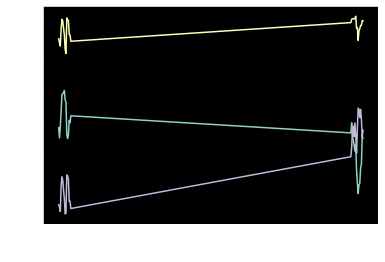

In [5]:
plt.plot(data['Epoch'], data['BGSEc'])
plt.xlabel(data['Epoch'].attrs['LABLAXIS'])
plt.ylabel(data['Magnitude'].attrs['LABLAXIS'] + ' ' +
           data['Magnitude'].attrs['UNITS'])
plt.show()

In [6]:
dataset = pd.DataFrame(list(data['BGSEc']))

In [7]:
a = cdas.get_variables('ERG_MGF_L2_8SEC')
print(a)

[{'Name': 'mag_8sec_dsi', 'ShortDescription': '', 'LongDescription': '8 sec resolution B in DSI coordinates'}, {'Name': 'mag_8sec_gse', 'ShortDescription': '', 'LongDescription': '8 sec resolution B in GSE coordinates'}, {'Name': 'mag_8sec_gsm', 'ShortDescription': '', 'LongDescription': '8 sec resolution B in GSM coordinates'}, {'Name': 'mag_8sec_sm', 'ShortDescription': '', 'LongDescription': '8 sec resolution B in SM coordinates'}, {'Name': 'magt_8sec', 'ShortDescription': '', 'LongDescription': '8 sec resolution total B'}, {'Name': 'rmsd_8sec_dsi', 'ShortDescription': '', 'LongDescription': '8 sec resolution RMSD for DSI'}, {'Name': 'rmsd_8sec_gse', 'ShortDescription': '', 'LongDescription': '8 sec resolution RMSD for GSE'}, {'Name': 'rmsd_8sec_gsm', 'ShortDescription': '', 'LongDescription': '8 sec resolution RMSD for GSM'}, {'Name': 'rmsd_8sec_sm', 'ShortDescription': '', 'LongDescription': '8 sec resolution RMSD for SM'}, {'Name': 'rmsd_8sec', 'ShortDescription': '', 'LongDescri

In [ ]:
    datasets = cdas.get_datasets(observatoryGroup=['Arase (ERG)'],
                                 instrumentType='Magnetic Fields (space)')
    print('Datasets:')
    for dataset in datasets:
        print('  ', dataset['Id'], dataset['Label'])

In [11]:
datasets

[{'Id': 'ERG_HEP_L2_OMNIFLUX',
  'Observatory': ['ERG'],
  'Instrument': ['HEP'],
  'ObservatoryGroup': ['Arase (ERG)'],
  'InstrumentType': ['Particles (space)'],
  'Label': 'High-energy electron experiments (HEP) Level-2 omni flux data, ARASE/ERG) - Takefumi Mitani (ISAS, JAXA)',
  'TimeInterval': {'Start': '2017-03-19T23:59:58.000Z',
   'End': '2020-12-31T23:59:54.000Z'},
  'PiName': 'Takefumi Mitani',
  'PiAffiliation': 'ISAS, JAXA',
  'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesE.html#ERG_HEP_L2_OMNIFLUX',
  'DatasetLink': [{'Title': 'the ERG Science Center website',
    'Text': 'For more information, see',
    'Url': 'http://ergsc.isee.nagoya-u.ac.jp'},
   {'Title': 'instrument papers in Earth, Planets and Space',
    'Text': 'ERG',
    'Url': 'https://www.springeropen.com/collections/erg'}]},
 {'Id': 'ERG_LEPE_L2_OMNIFLUX',
  'Observatory': ['ERG'],
  'Instrument': ['LEPE'],
  'ObservatoryGroup': ['Arase (ERG)'],
  'InstrumentType': ['Particles (space)'],
  'Label': 'Low-En

In [17]:
#  Edit the following vars and time variables to suit your needs.
vars = ['pos_gse']
time = ['2022-01-03T00:31:56.000Z', '2022-01-03T01:31:56.000Z']
status, data = cdas.get_data(dataset = 'ERG_ORB_L2', variables=vars, time0=time[0], time1=time[1])
print(data['pos_gse'])
print(data['pos_gse'].attrs)

[[ 4.467431   -3.490711   -0.39276803]
 [ 4.4691243  -3.4901295  -0.3919202 ]
 [ 4.4708166  -3.489547   -0.39107215]
 ...
 [ 5.241722   -2.976947    0.12475991]
 [ 5.2426248  -2.9758346   0.12563086]
 [ 5.243525   -2.9747236   0.12650192]]
{'FIELDNAM': 'Positions GSE', 'CATDESC': 'Spacecraft positions in GSE coordinates', 'VALIDMIN': -1e+31, 'VALIDMAX': 1e+31, 'SCALEMIN': '-1.0E31', 'SCALEMAX': '1.0E31', 'UNITS': 'RE', 'DEPEND_0': 'epoch', 'LABL_PTR_1': 'metavar0', 'MONOTON': 'false', 'FORMAT': 'E10.3', 'FILLVAL': -1e+31, 'VAR_TYPE': 'data', 'AVG_TYPE': 'standard', 'DISPLAY_TYPE': 'time_series', 'SCALETYP': 'linear', 'DIM_SIZES': 3}


In [8]:
pd.DataFrame(data['pos_gse'])

,0,1,2
0,4.467431,-3.490711,-0.392768
1,4.469124,-3.490129,-0.391920
2,4.470817,-3.489547,-0.391072
3,4.472507,-3.488963,-0.390224
4,4.474196,-3.488379,-0.389376
...,...,...,...
595,5.239915,-2.979165,0.123018
596,5.240819,-2.978057,0.123889
597,5.241722,-2.976947,0.124760
598,5.242625,-2.975835,0.125631


In [18]:
#  Edit the following vars and time variables to suit your needs.
vars = ['dens_lop','vel_lop','dens_hip','temp_hip','theta_phi_hip','tratio_hip','dens_e','temp_e','theta_phi_e','tratio_e','sc_pot','bkgd','sc_pos_geo','sc_pos_mag','sc_pos_syngci']
time = ['2008-01-03T00:31:56.000Z', '2008-01-03T01:31:56.000Z']
status, data = cdas.get_data('A1_K0_MPA', vars, time[0], time[1])
print(data['dens_lop'])
print(data['dens_lop'].attrs)

[16.510057 22.253317 18.446827 18.516981 23.42205  17.449677 31.76576
 30.91586  23.801039 15.967307 15.218329 17.358906 19.527601 24.444122
 16.872025 25.159296 33.498726 32.625477 15.193877 15.266717 17.163284
 16.411867 29.80397  24.42696  24.744215 22.603706 26.002949 29.612906
 30.452105 13.946511 24.575712 24.525755 29.96741  32.726284 16.103355
 15.988209 32.090725 16.359787 29.297989 14.590236 13.403971]
{'FIELDNAM': 'partial density low-E p', 'VALIDMIN': 0.0, 'VALIDMAX': 100000.0, 'SCALEMIN': 0.1, 'SCALEMAX': 1000.0, 'CATDESC': 'Partial density of low energy ions (1-130 eV/e)', 'UNITS': 'cm-3', 'FORMAT': 'f8.2', 'FILLVAL': -1e+31, 'DEPEND_0': 'Epoch', 'VAR_TYPE': 'data', 'LABLAXIS': 'low p dens', 'DIM_SIZES': 0}


In [19]:
data['temp_hip']

VarCopy([[2528.6135, 3615.2434],
         [2629.2683, 3824.8054],
         [2649.432 , 3955.7632],
         [2555.3525, 3849.6326],
         [2597.1592, 3898.5652],
         [2658.8376, 3895.233 ],
         [2594.002 , 3743.6348],
         [2517.321 , 3718.1226],
         [2377.2297, 3854.466 ],
         [2529.5454, 4033.6052],
         [2672.578 , 3989.1992],
         [2629.124 , 3728.988 ],
         [2488.1504, 3722.1194],
         [2530.6062, 3848.852 ],
         [2608.7588, 3835.1797],
         [2438.427 , 3700.6528],
         [2699.49  , 3758.9707],
         [2597.331 , 3694.8772],
         [2538.9   , 3808.407 ],
         [2511.3013, 3874.261 ],
         [2512.7302, 3933.591 ],
         [2527.116 , 3853.855 ],
         [2503.569 , 3626.0947],
         [2562.357 , 3786.6614],
         [2419.424 , 3665.9658],
         [2454.8284, 3747.7751],
         [2583.0654, 4056.1787],
         [2565.4282, 3788.606 ],
         [2497.3086, 3649.2424],
         [2529.8591, 3732.5676],
         [